## Урок 2. Keras

In [8]:
#!pip install tensorflow
#!pip install keras
#!pip install mnist

In [7]:
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [9]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

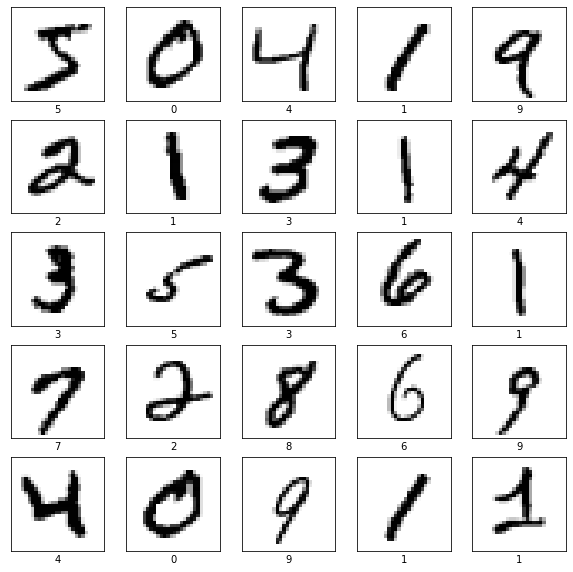

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [10]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [11]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [12]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [13]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [14]:
# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3714 - accuracy: 0.8878
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1891 - accuracy: 0.9419
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1455 - accuracy: 0.9550
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1222 - accuracy: 0.9623
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1081 - accuracy: 0.9651


In [15]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 2ms/step - loss: 0.1104 - accuracy: 0.9671


[0.11039181798696518, 0.9671000242233276]

In [16]:
# Save the model to disk.
model.save_weights('model.h5')

In [17]:
# Load the model from disk later using:
# model.load_weights('model.h5')

In [18]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

In [19]:
# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

[7 2 1 0 4]


In [20]:
# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]


### Практическое задание

**1. Попробуйте обучить нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?**

**Посмотрим как повлияет на точность увеличение количества "эпох" (epochs) например до 20 или количества нейронов во внутренних слоях нейросети (например до 512):**

In [43]:
# Build the model.
model_01 = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])
# Compile the model.
model_01.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
# Train the model.
model_01.fit(
  train_images,
  to_categorical(train_labels),
  epochs=20,
  batch_size=32,
)
# Evaluate the model.
print('---------------------------------------------------------------------')
print('test data loss/accuracy')
model_01.evaluate(
  test_images,
  to_categorical(test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3602 - accuracy: 0.8923
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1874 - accuracy: 0.9427
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1421 - accuracy: 0.9563
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1194 - accuracy: 0.9630
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1040 - accuracy: 0.9675
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0930 - accuracy: 0.9708
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0836 - accuracy: 0.9737
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0784 - accuracy: 0.9743
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0722 - accuracy: 0.9764
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.067

[0.10352256149053574, 0.97079998254776]

In [72]:
# Build the model.
model_01 = Sequential([
  Dense(512, activation='relu', input_shape=(784,)),
  Dense(512, activation='relu'),
  Dense(10, activation='softmax'),
])
# Compile the model.
model_01.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
# Train the model.
model_01.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)
# Evaluate the model.
print('---------------------------------------------------------------------')
print('test data loss/accuracy')
model_01.evaluate(
  test_images,
  to_categorical(test_labels)
)

Epoch 1/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2620 - accuracy: 0.9180
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1325 - accuracy: 0.9588
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1014 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0862 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0705 - accuracy: 0.9776
---------------------------------------------------------------------
test data loss/accuracy
313/313 [==============================] - 1s 4ms/step - loss: 0.0922 - accuracy: 0.9730


[0.09222609549760818, 0.9729999899864197]

**Заметен определенный прирост в точности, но также и значительное увеличение затрат времени на обучение.**  
**Помимо этого, наблюдаем признаки переобучения - существенно возросла точность на тренировочных данных, но при этом большой разрыв с точностью на тестовых. Попробуем найти компромисс посередине - увеличим количество нейронов во внутренних слоях до 256 и количетво эпох до 7:**

In [67]:
# Build the model.
model_01 = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dense(256, activation='relu'),
  Dense(10, activation='softmax'),
])
# Compile the model.
model_01.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
# Train the model.
model_01.fit(
  train_images,
  to_categorical(train_labels),
  epochs=7,
  batch_size=32,
)
# Evaluate the model.
print('---------------------------------------------------------------------')
print('test data loss/accuracy')
model_01.evaluate(
  test_images,
  to_categorical(test_labels)
)

Epoch 1/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2784 - accuracy: 0.9139
Epoch 2/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1372 - accuracy: 0.9569
Epoch 3/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1049 - accuracy: 0.9675
Epoch 4/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0857 - accuracy: 0.9731
Epoch 5/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0742 - accuracy: 0.9762
Epoch 6/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0627 - accuracy: 0.9797
Epoch 7/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0554 - accuracy: 0.9820
---------------------------------------------------------------------
test data loss/accuracy
313/313 [==============================] - 1s 2ms/step - loss: 0.0894 - accuracy: 0.9744


[0.08944139629602432, 0.974399983882904]

**Как и ожидалось, получили нечто среднее по качеству и временным затратам на обучение.**

**Вывод: для повышения точности в данном случае можно увеличивать количество нейронов на внутренних слоях нейросети и количество "эпох" при обучении. Но это имеет смысл лишь до определенных пределов. Так, неразумное увеличение данных параметров приводит к переобучению, плюс после какого-то момента вряд ли принесет прирост качества сопоставимый с временными затратами на обучение нейросети.**

**2. Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.**

In [83]:
# саммари модели
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [82]:
# подробная информация о слоях
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_init

In [92]:
# веса модели
model.get_weights()

[array([[-0.05638211,  0.08194385,  0.01055874, ...,  0.07275433,
          0.06246375,  0.01497343],
        [ 0.00558947,  0.04456476, -0.06612772, ...,  0.00398041,
          0.06126115,  0.02257146],
        [ 0.02361027,  0.08144155, -0.0691749 , ...,  0.06652456,
          0.05052719, -0.06141577],
        ...,
        [ 0.07912908, -0.01189323,  0.0050544 , ..., -0.06077412,
         -0.01658082,  0.07119469],
        [ 0.06188041,  0.03950415, -0.05822353, ..., -0.07076077,
         -0.02942375, -0.06056229],
        [ 0.05213358,  0.07517795,  0.08496037, ..., -0.0077893 ,
         -0.04136141, -0.01151042]], dtype=float32),
 array([-0.0064659 , -0.01174064, -0.0136733 , -0.00672438,  0.00138438,
         0.04515605, -0.00664872,  0.00716624, -0.006305  , -0.01912082,
        -0.00548213,  0.01033243, -0.00743329, -0.00496359, -0.02379785,
         0.01459631,  0.01003681,  0.01835761, -0.00414987,  0.002484  ,
        -0.00282032,  0.01865459,  0.01447408,  0.02853247, -0.000